In [171]:
import os
import numpy as np
import pandas as pd

from datetime import datetime
from sklearn.preprocessing import LabelEncoder

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [172]:

!ls
%mkdir data
!ls

import shutil
from google.colab import drive
drive.mount('/content/drive')


data  drive  sample_data
mkdir: cannot create directory ‘data’: File exists
data  drive  sample_data
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
## dataset 44
## https://www.kaggle.com/datasets/abhijitdahatonde/real-time-latest-covid-19-dataset

In [174]:
shutil.copy("/content/drive/MyDrive/sis_420/examen/covid.csv","/content/data/datos.csv")

data = pd.read_csv( os.path.join('data', 'datos.csv') )


In [175]:
data.drop(columns=data.columns[0], axis=1, inplace=True) #elimino la col SR. No
data.drop(columns=data.columns[0], axis=1, inplace=True) #elimino la col Country/other

#datos.head()
data.info() # informacion y verificar que todos los datos esten completos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Total_cases      230 non-null    int64
 1   Total_deaths     230 non-null    int64
 2   Total_recovered  230 non-null    int64
 3   Active_cases     230 non-null    int64
 4   Serious_cases    230 non-null    int64
 5   Total_tests      230 non-null    int64
 6   Population       230 non-null    int64
dtypes: int64(7)
memory usage: 12.7 KB


In [176]:
col = data.pop("Active_cases")
data.insert(len(data.columns), "Active_cases", col)


In [177]:

data.info()
# print(data)
X = data.iloc[:, :6].values
y = data.iloc[:, 6].values
m = y.size
#
x_nrm = X.copy()
print(X)
print('='*25)
print(y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Total_cases      230 non-null    int64
 1   Total_deaths     230 non-null    int64
 2   Total_recovered  230 non-null    int64
 3   Serious_cases    230 non-null    int64
 4   Total_tests      230 non-null    int64
 5   Population       230 non-null    int64
 6   Active_cases     230 non-null    int64
dtypes: int64(7)
memory usage: 12.7 KB
[[ 107715650    1171803  105773383        894 1181246915  334805269]
 [  44996198     531920   44462773          0  930797975 1406631776]
 [  40138560     167642   39970918        869  271490188   65584518]
 ...
 [        80          0          0          0          0       1378]
 [        29          0         29          0          0        799]
 [        10          1          9          0          0     626161]]
[ 770464    1505       0   13733  784999 

In [178]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [179]:
# Normalizamos los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[ 107715650    1171803  105773383        894 1181246915  334805269]
 [  44996198     531920   44462773          0  930797975 1406631776]
 [  40138560     167642   39970918        869  271490188   65584518]
 ...
 [        80          0          0          0          0       1378]
 [        29          0         29          0          0        799]
 [        10          1          9          0          0     626161]]
Media calculada: [3.01381687e+06 3.00305348e+04 2.71520852e+06 2.89130435e+01
 3.04323251e+07 3.45431962e+07]
Desviación estandar calculada: [9.76809621e+06 1.06580221e+05 9.35343625e+06 1.05361495e+02
 1.14937868e+08 1.38052231e+08]
[[10.71875531 10.71279877 11.01821531  8.21065568 10.01249295  2.17498891]
 [ 4.29790823  4.70903005  4.46333982 -0.27441755  7.83349882  9.9389091 ]
 [ 3.80061194  1.29115387  3.98310401  7.97337734  2.09728846  0.22485201]
 ...
 [-0.30852858 -0.28176461 -0.29028995 -0.27441755 -0.26477197 -0.25020833]
 [-0.3085338  -0.28176461 -0.29028685 -0.

In [180]:
# Añade el termino de interseccion a X (cols de 1)
x_read = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(x_read)

[[ 1.         10.71875531 10.71279877 ...  8.21065568 10.01249295
   2.17498891]
 [ 1.          4.29790823  4.70903005 ... -0.27441755  7.83349882
   9.9389091 ]
 [ 1.          3.80061194  1.29115387 ...  7.97337734  2.09728846
   0.22485201]
 ...
 [ 1.         -0.30852858 -0.28176461 ... -0.27441755 -0.26477197
  -0.25020833]
 [ 1.         -0.3085338  -0.28176461 ... -0.27441755 -0.26477197
  -0.25021252]
 [ 1.         -0.30853575 -0.28175523 ... -0.27441755 -0.26477197
  -0.24568263]]


In [181]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]     # numero de ejemplos de entrenamiento
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [182]:

theta = np.array([1, 3.01381687e+06, 3.00305348e+04, 2.71520852e+06, 2.89130435e+01,  3.04323251e+07, 3.45431962e+07])
JJ = computeCostMulti(x_read, y, theta)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")


con theta:[1.00000000e+00 3.01381687e+06 3.00305348e+04 2.71520852e+06
 2.89130435e+01 3.04323251e+07 3.45431962e+07] se obtiene un costo de: 1864829276087632.2


In [183]:
# por el metodo de descenso por el gradiente

In [184]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]        # numero de ejemplos de entrenamiento
    theta = theta.copy()  # realiza una copia de theta
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

theta calculado por el descenso por el gradiente: 
[ 31696.48344624  29990.18499025  64820.42720863  41557.57258408
  -9725.82989785 -71679.13407616   6782.73677548]

El valor predecido es por descenso por el gradiente:  31696.483439220247


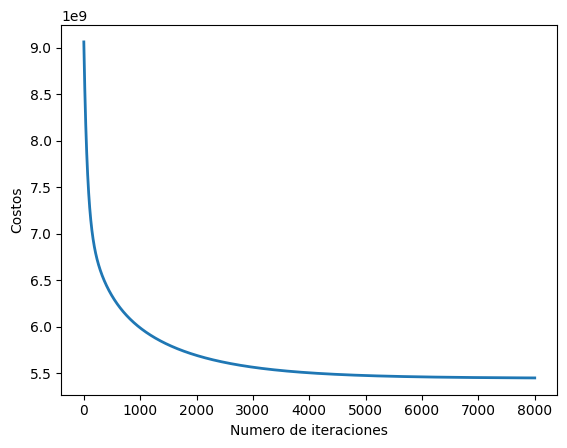

In [185]:
# Elegimos el valor mas adecuado para ALPHA
alpha = 0.002
num_iters = 8000

# Ejecutamos el descenso por el gradiente
theta = np.zeros(7)
theta, J_history = gradientDescentMulti(x_read, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costos')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: ')
print( str(theta))

# Valores la cantidad de infectados por covid
X_array = [1, 3.01381687e+06, 3.00305348e+04, 2.71520852e+06, 2.89130435e+01,  3.04323251e+07, 3.45431962e+07]
# X_array = [1, 40138560,	167642,	39970918,	0,	869,	271490188	]
X_array[1:7] = (X_array[1:7] - mu) / sigma
price = np.dot(X_array, theta)

print('\nEl valor predecido es por descenso por el gradiente: ', price)

In [186]:
# Ecuacion de la normal

In [187]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [188]:
X_ren = np.concatenate([np.ones((m, 1)), x_nrm], axis=1)

In [189]:
theta = calcularThethaEcuacionNormal(X_ren, y);
print(f"los valores de theta calculados son: { theta }")

los valores de theta calculados son: [ 1.20175369e+04  2.28808901e-03  6.13275913e-01  5.71229407e-03
 -9.51685436e+01 -6.73604291e-04  6.09947210e-05]


In [190]:
# X_array = [1, 3.01381687e+06, 3.00305348e+04, 2.71520852e+06, 2.89130435e+01,  3.04323251e+07, 3.45431962e+07]

X_array = [1, 191118, 2561760, 115587, 21,	274511572, 60262770]
infectados = np.dot(X_array, theta)

print('Usando la ecuación de la normal:', infectados)


Usando la ecuación de la normal: 1400945.8001787115
